In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame()
for i in range(1,16):
    temp = pd.read_csv(f"RM{i}.csv", parse_dates = ["date"])
    print(f"RM{i} has {len(temp)} rows")
    df = pd.concat([df, temp], ignore_index=True)

RM1 has 1001 rows
RM2 has 1001 rows
RM3 has 1000 rows
RM4 has 1001 rows
RM5 has 1001 rows
RM6 has 967 rows
RM7 has 967 rows
RM8 has 967 rows
RM9 has 1000 rows
RM10 has 1000 rows
RM11 has 1001 rows
RM12 has 1001 rows
RM13 has 1001 rows
RM14 has 1000 rows
RM15 has 1000 rows


In [4]:
# Delete unneeded columns
df.drop(columns=['VWC_40zone','rd_3day','rd_3day_lag'], inplace=True)

In [7]:
# Show percent of missing values in columns
df.isna().mean().round(4) * 100

date          0.00
VWC5          6.43
EV24          0.00
FG            0.00
Q             0.00
rd            0.10
SQ            0.00
TN            0.00
TX            0.00
UG            0.00
LAI           0.00
Crop          0.00
BOFEK         0.00
VWC5_lag      6.52
VWC5_lag3     6.69
VWC5_lag40    9.92
EV24_lag      0.00
FG_lag        0.00
Q_lag         0.00
rd_lag        0.10
SQ_lag        0.00
TN_lag        0.00
TX_lag        0.00
UG_lag        0.00
LAI_lag       0.00
DOY           0.00
dtype: float64

In [6]:
# Plot % of missing values for each individual station
missing_values_table = pd.DataFrame()
missing_values_table[' '] = df.columns
for i in range(1,16):
    RM = pd.read_csv(f"RM{i}.csv", parse_dates = ["date"])
    RM.drop(columns=['VWC_40zone','rd_3day','rd_3day_lag'], inplace=True)
    series = RM.isna().mean().round(4) * 100
    missing_values_table[f'RM{i}'] = series.values
missing_values_table['Total'] = (df.isna().mean().round(4) * 100).values
    
# Highlight rows with missing values and style the table    
highlight = lambda x: ['background: #ffa754' if x.name in [1,5,13,14,15,19] else 'background: white' for i in x]
missing_values_table = missing_values_table.style.apply(highlight,axis=1)
missing_values_table.format(precision=2)
    
missing_values_table

,,RM1,RM2,RM3,RM4,RM5,RM6,RM7,RM8,RM9,RM10,RM11,RM12,RM13,RM14,RM15,Total
0,date,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,VWC5,0.00,6.79,0.00,0.00,7.89,16.13,0.00,0.00,26.90,15.00,6.49,6.59,8.39,2.20,0.00,6.43
2,EV24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,FG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Q,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,rd,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
6,SQ,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,TN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,TX,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,UG,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Plot variables

In [8]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

def load_data(RM):
    RM_ret = pd.read_csv(f"{RM}_imputed.csv", parse_dates = ["date"]) 
    return RM_ret 
RM1 = load_data('RM1')  
RM2 = load_data('RM2') 
RM3 = load_data('RM3') 
RM4 = load_data('RM4') 
RM5 = load_data('RM5') 
RM6 = load_data('RM6') 
RM7 = load_data('RM7') 
RM8 = load_data('RM8') 
RM9 = load_data('RM9') 
RM10 = load_data('RM10') 
RM11 = load_data('RM11') 
RM12 = load_data('RM12') 
RM13 = load_data('RM13') 
RM14 = load_data('RM14') 
RM15 = load_data('RM15') 

# helper function for plotting
def plot_scatterplot(col_name, color='red'):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(15,4))
    #plt.figure().set_figwidth(8)
    ax1.scatter(x=df.date, y=df[f"{col_name}"], s=2, color=mcolors.CSS4_COLORS[f"{color}"])
    ax1.set_title(f"Total {col_name}")
    #plt.figure().set_figwidth(8)
    ax2.scatter(x=RM1.date, y=RM1[f"{col_name}"], s=2, color=mcolors.CSS4_COLORS[f"{color}"])
    ax2.set_title(f"{col_name} for one station")
    plt.show()

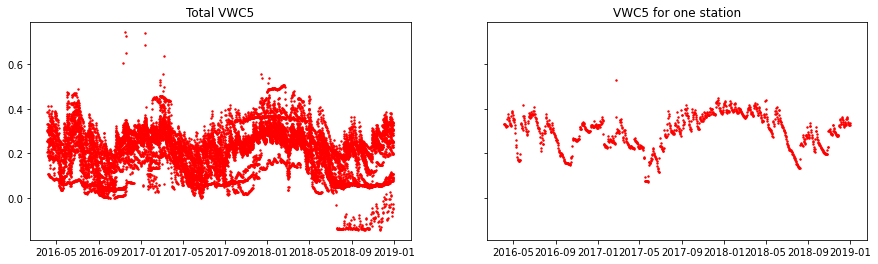

In [22]:
plot_scatterplot("VWC5")

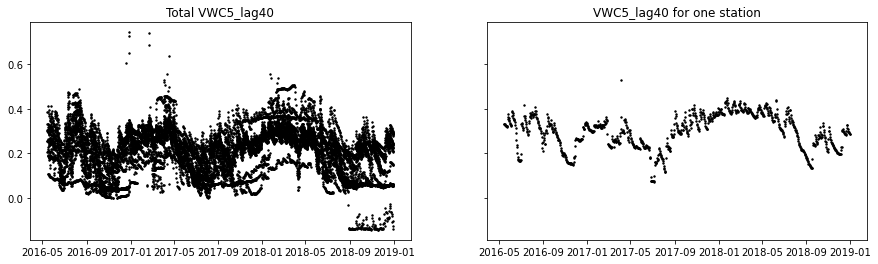

In [23]:
plot_scatterplot("VWC5_lag40", "black")

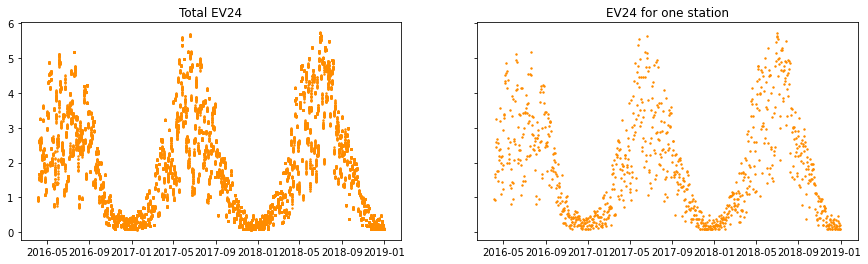

In [24]:
plot_scatterplot("EV24","darkorange")

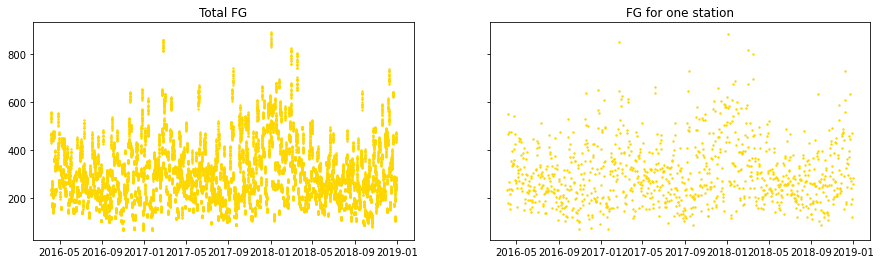

In [25]:
plot_scatterplot("FG", "gold")

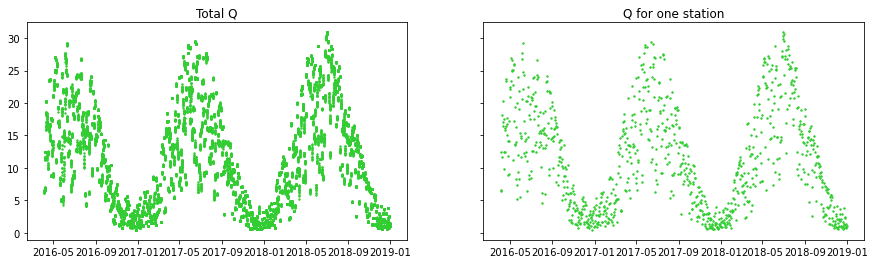

In [26]:
plot_scatterplot("Q","limegreen")

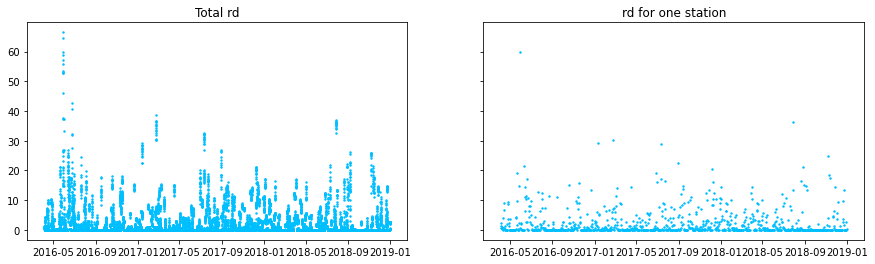

In [27]:
plot_scatterplot("rd","deepskyblue")

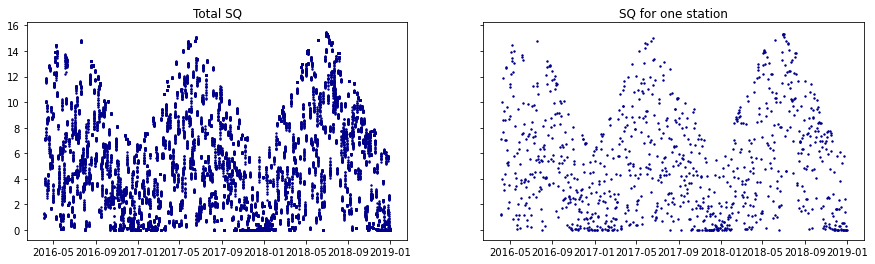

In [28]:
plot_scatterplot("SQ","darkblue")

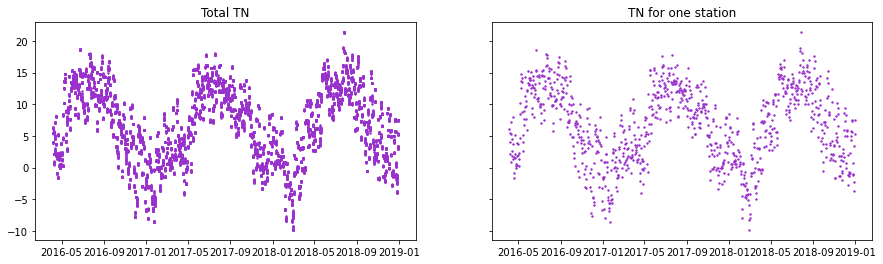

In [29]:
plot_scatterplot("TN","darkorchid")

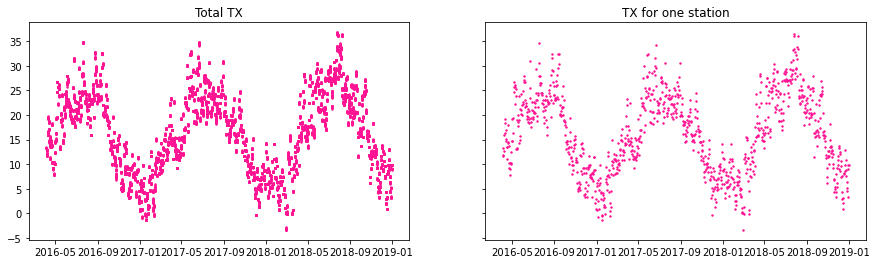

In [30]:
plot_scatterplot("TX","deeppink")

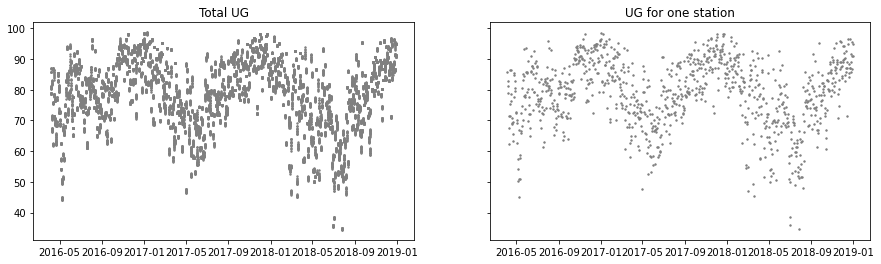

In [31]:
plot_scatterplot("UG","gray")

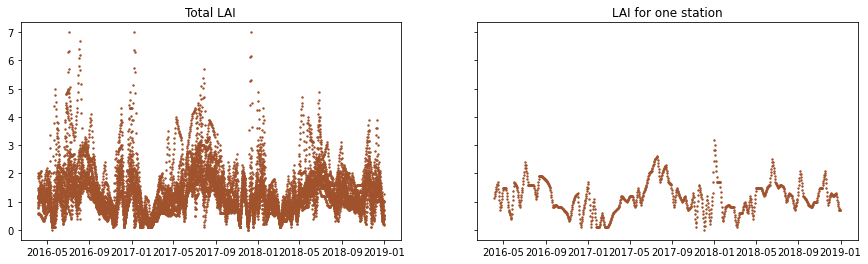

In [32]:
plot_scatterplot("LAI","sienna")

# Descriptive statistics

Get descriptive statistics of the variables:

In [165]:
df2.describe()

,VWC5,EV24,FG,Q,rd,SQ,TN,TX,UG,LAI,BOFEK,VWC5_lag,VWC5_lag3,VWC5_lag40,EV24_lag,FG_lag,Q_lag,rd_lag,SQ_lag,TN_lag,TX_lag,UG_lag,LAI_lag,DOY,304,305,309,311,312,317,409,beans,chicory,corn,fennel,grass,lettuce,onion,potato,sugarbeet,wheat
count,13949.000000,14908.000000,14908.000000,14908.000000,14893.000000,14908.00000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,13936.000000,13910.000000,13429.000000,14908.000000,14908.000000,14908.000000,14893.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000,14908.000000
mean,0.207412,1.838368,293.780339,11.199950,2.168059,5.24424,6.741667,16.347005,78.705961,1.307682,313.667360,0.207406,0.207404,0.207431,1.840413,293.842226,11.211851,2.168898,5.250201,6.742388,16.354817,78.683461,1.308413,196.599812,0.400389,0.201435,0.067145,0.134223,0.067078,0.064865,0.064865,0.024483,0.015898,0.183257,0.024483,0.534612,0.048967,0.018178,0.048967,0.052187,0.048967
std,0.104582,1.456451,125.428660,7.890685,4.602826,4.07220,5.892769,8.022449,11.116593,0.751851,25.405289,0.104576,0.104560,0.103867,1.456144,125.440389,7.887665,4.602660,4.071647,5.893333,8.021047,11.116442,0.751838,101.143434,0.489994,0.401086,0.250282,0.340903,0.250166,0.246295,0.246295,0.154550,0.125083,0.386890,0.154550,0.498817,0.215806,0.133600,0.215806,0.222411,0.215806
min,-0.144000,0.070000,65.550000,0.450000,0.000000,0.00000,-9.820000,-3.360000,34.340000,0.000000,304.000000,-0.144000,-0.144000,-0.144000,0.070000,65.550000,0.450000,0.000000,0.000000,-9.820000,-3.360000,34.340000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130800,0.500000,201.417500,3.977500,0.000000,1.64000,2.060000,9.820000,71.860000,0.800000,304.000000,0.130875,0.130900,0.131700,0.500000,201.417500,3.990000,0.000000,1.650000,2.060000,9.830000,71.860000,0.800000,116.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221200,1.590000,271.880000,10.080000,0.000000,4.70000,7.230000,16.250000,79.940000,1.200000,305.000000,0.221100,0.221100,0.220400,1.590000,271.980000,10.110000,0.000000,4.710000,7.220000,16.270000,79.930000,1.200000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.278600,2.830000,365.190000,16.770000,2.200000,8.21000,11.680000,22.932500,87.292500,1.650000,311.000000,0.278525,0.278500,0.277000,2.840000,365.240000,16.780000,2.200000,8.220000,11.680000,22.940000,87.260000,1.653125,283.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.743300,5.740000,892.110000,30.910000,66.500000,15.47000,21.350000,36.810000,98.750000,7.000000,409.000000,0.743300,0.743300,0.743300,5.740000,892.110000,30.910000,66.500000,15.470000,21.350000,36.810000,98.750000,7.000000,366.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['Crop'].value_counts()

grass        7970
corn         2732
sugarbeet     778
lettuce       730
potato        730
wheat         730
fennel        365
beans         365
onion         271
chicory       237
Name: Crop, dtype: int64

In [7]:
df['BOFEK'].value_counts()

BOFEK
304    5969
305    3003
311    2001
309    1001
312    1000
409     967
317     967
Name: count, dtype: int64

# Check for stationarity of time-series (after data imputation)

We will check the stationarity of variables with the Fuller's test.

In [9]:
#!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

# test that it works
series = RM5['EV24']
X = series.values
result = adfuller(X)
if result[1] > 0.05: 
    print(f'p-value: {result[1]} - non-stationary')
else: 
    print(f'p-value: {result[1]} - stationary')

p-value: 0.38590220981949686 - non-stationary


In [53]:
df.columns

Index(['date', 'VWC5', 'EV24', 'FG', 'Q', 'rd', 'SQ', 'TN', 'TX', 'UG', 'LAI',
       'Crop', 'BOFEK', 'VWC5_lag', 'VWC5_lag3', 'VWC5_lag40', 'EV24_lag',
       'FG_lag', 'Q_lag', 'rd_lag', 'SQ_lag', 'TN_lag', 'TX_lag', 'UG_lag',
       'LAI_lag', 'DOY'],
      dtype='object')

In [56]:
# Plot stationarity of variables for each individual station
table = pd.DataFrame()
table[' '] = RM1.columns
for i in range(1,16):
    RM = pd.read_csv(f"RM{i}_imputed.csv", parse_dates = ["date"])
    RM.drop(columns=['date', 'DOY', 'Crop', 'BOFEK', 'year', 'rd', 'VWC5_lag', 'VWC5_lag3', 
                     'VWC5_lag40', 'rd_lag', 'VWC5'], inplace=True)
    ind = 0
    table[f'RM{i}'] = RM['EV24']
    for col in RM.columns:
        series = RM[col]
        X = series.values

        result = adfuller(X)
        if result[1] > 0.05: 
            table[f'RM{i}'][ind] = 'non-st'
        else: 
            table[f'RM{i}'][ind] = ' '
        ind += 1
        
table

C:\Users\Vector\AppData\Local\Temp/ipykernel_2692/3964234830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_table[f'RM{i}'][ind] = 'non-st'
C:\Users\Vector\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Vector\AppData\Local\Temp/ipykernel_2692/3964234830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

C:\Users\Vector\AppData\Local\Temp/ipykernel_2692/3964234830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values_table[f'RM{i}'][ind] = 'non-st'
C:\Users\Vector\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Vector\AppData\Local\Temp/ipykernel_2692/3964234830.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

,,RM1,RM2,RM3,RM4,RM5,RM6,RM7,RM8,RM9,RM10,RM11,RM12,RM13,RM14,RM15
0,EV24,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
1,FG,,,,,,,,,,,,,,,
2,Q,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
3,SQ,,,,,,,,,,,,,,,
4,TN,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
5,TX,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
6,UG,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
7,LAI,,non-st,,,,,,,,non-st,,,,,
8,EV24_lag,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st,non-st
9,FG_lag,,,,,,,,,,,,,,,
